## Import the required libraries



In [111]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:


data= pd.read_csv("C:\\Users\\POOJAANAND\\Documents\\Gaurav\\Zomato\\EDA\\zomato.csv")

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

contain 17 columns and 51717 rows

#### Dropping irrelevant columns

In [5]:
zomato= data.drop(['url','dish_liked', 'phone' ], axis= 1)

#### Check Null values and remove null values

In [6]:
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [7]:
#drop all null values as listed above
zomato.dropna(how='any', inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43533 non-null  object
 1   name                         43533 non-null  object
 2   online_order                 43533 non-null  object
 3   book_table                   43533 non-null  object
 4   rate                         43533 non-null  object
 5   votes                        43533 non-null  int64 
 6   location                     43533 non-null  object
 7   rest_type                    43533 non-null  object
 8   cuisines                     43533 non-null  object
 9   approx_cost(for two people)  43533 non-null  object
 10  reviews_list                 43533 non-null  object
 11  menu_item                    43533 non-null  object
 12  listed_in(type)              43533 non-null  object
 13  listed_in(city)              43

#### Renaming columns like "approx_cost(for two people)" , 'listed_in(type)', 'listed_in(city)'

In [8]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)': 'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

#### Transforming values of columns like Cost , Rate, Online_table, book_online

In [10]:
zomato.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [11]:
zomato['cost'].nunique()

66

In [12]:
zomato['cost'].values

array(['800', '800', '800', ..., '1,500', '2,500', '1,500'], dtype=object)

In [15]:

zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info() # looking at the dataset information after transformation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43533 non-null  object 
 1   name          43533 non-null  object 
 2   online_order  43533 non-null  object 
 3   book_table    43533 non-null  object 
 4   rate          43533 non-null  object 
 5   votes         43533 non-null  int64  
 6   location      43533 non-null  object 
 7   rest_type     43533 non-null  object 
 8   cuisines      43533 non-null  object 
 9   cost          43533 non-null  float64
 10  reviews_list  43533 non-null  object 
 11  menu_item     43533 non-null  object 
 12  type          43533 non-null  object 
 13  city          43533 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [16]:
zomato['cost'].values

array([800. , 800. , 800. , ...,   1.5,   2.5,   1.5])

In [17]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
zomato['rate'].values

array(['4.1/5', '4.1/5', '3.8/5', ..., '3.6 /5', '4.3 /5', '3.4 /5'],
      dtype=object)

In [19]:
zomato = zomato.loc[zomato.rate!= 'NEW']
zomato = zomato.loc[zomato.rate!= '-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '')if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype(float)
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [20]:
zomato['name'].head()

0                    Jalsa
1           Spice Elephant
2          San Churro Cafe
3    Addhuri Udupi Bhojana
4            Grand Village
Name: name, dtype: object

In [21]:
zomato.name = zomato.name.apply(lambda x: x.title())

zomato.online_order.replace(('Yes', 'No'),('True', 'False'), inplace = True)
zomato.book_table.replace(('Yes', 'No'),('True', False), inplace = True)
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [22]:
zomato.cost.unique()


array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [23]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### drop duplicates

In [52]:
# Group and aggregate duplicate restaurants that are listed under multiple types in type
grouped = zomato.groupby(['name', 'address']).agg({'type':list})
newdata= pd.merge(grouped, zomato, on= (['name', 'address']))

In [53]:
newdata.head(4)

#duplicates can be seen in type_x

,name,address,type_x,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type_y,city
0,#Feeltheroll,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",False,False,3.4,7,Bellandur,Quick Bites,Fast Food,200.0,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
1,#Feeltheroll,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",False,False,3.4,7,Bellandur,Quick Bites,Fast Food,200.0,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Sarjapur Road
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",True,False,3.9,48,HSR,Quick Bites,"Fast Food, Beverages",400.0,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
3,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",True,False,3.9,48,HSR,Quick Bites,"Fast Food, Beverages",400.0,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM


In [54]:
# Drop rows which have duplicate information in "name", "address" and "type_x"

newdata['type_x']= newdata['type_x'].astype(str)

newdata.drop_duplicates(subset = ['name', 'address', 'type_x'], inplace= True)

In [56]:
newdata.shape

(9438, 15)

In [57]:
newdata.describe(include='all')

,name,address,type_x,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type_y,city
count,9438,9438,9438,9438,9438,9438.000000,9438.000000,9438,9438,9438,9438.000000,9438,9438,9438,9438
unique,6572,8792,881,2,2,NaN,NaN,92,87,2273,NaN,9056,2032,7,30
top,Cafe Coffee Day,Delivery Only,"['Delivery', 'Dine-out']",True,False,NaN,NaN,Whitefield,Quick Bites,North Indian,NaN,[],[],Delivery,BTM
freq,49,22,907,5815,8502,NaN,NaN,625,3533,493,NaN,359,7393,6578,1117
mean,NaN,NaN,NaN,NaN,NaN,3.625927,238.948506,NaN,NaN,NaN,376.735076,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.429219,670.416494,NaN,NaN,NaN,223.709229,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.800000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.300000,16.000000,NaN,NaN,NaN,200.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.700000,51.000000,NaN,NaN,NaN,400.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.900000,186.000000,NaN,NaN,NaN,500.000000,NaN,NaN,NaN,NaN


There are 6572 unique resturants , out of which Cafe coffee day has the highest occurence 49 

Out of total 92 locations Whitefield, has the highest number of resturants

Most common resturant type of "Quick Bytes"

North Indian cuisines is the most common type of cuisines

Delivery is the most common listed type 


#### Encode the input Variables

In [58]:
#Encode the input Variables
def Encode(newdata):
    for column in newdata.columns[~newdata.columns.isin(['rate', 'cost', 'votes'])]:
        newdata[column] = newdata[column].factorize()[0]
    return newdata

zomato_en = Encode(newdata.copy())
zomato_en.head() # looking at the dataset after transformation

,name,address,type_x,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type_y,city
0,0,0,0,0,0,3.4,7,0,0,0,200.0,0,0,0,0
2,1,1,1,1,0,3.9,48,1,0,1,400.0,1,0,0,1
11,2,2,2,1,0,3.7,37,2,1,2,400.0,2,1,1,2
14,3,3,3,1,0,3.2,49,3,0,3,300.0,3,0,0,1
20,4,4,4,0,0,3.7,41,4,2,4,450.0,4,0,2,1


#### Correlation between variables

In [59]:
corr = zomato_en.corr(method= 'kendall')

Index(['name', 'address', 'type_x', 'online_order', 'book_table', 'rate',
       'votes', 'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type_y', 'city'],
      dtype='object')

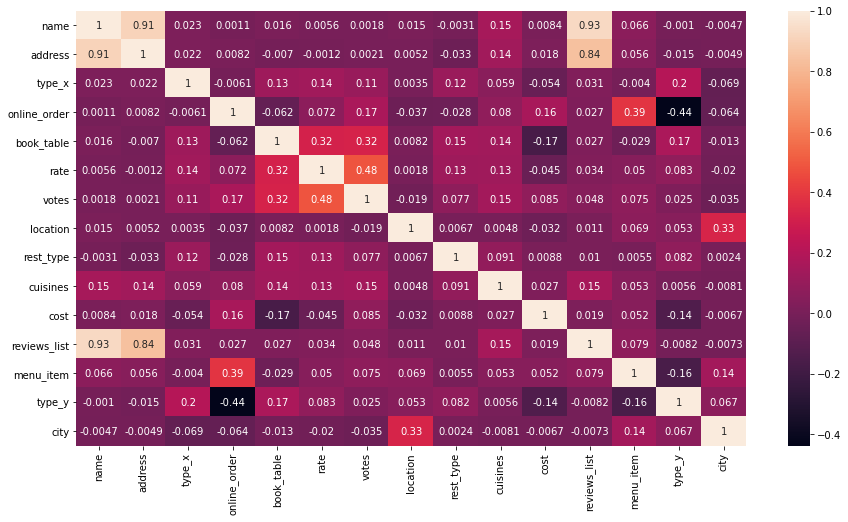

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot= True)
zomato_en.columns

#### Which cuisine has the highest occurence

In [61]:
pd.DataFrame(zomato.groupby(['cuisines'])['cuisines'].agg(['count']).sort_values('count', ascending =False)).head(10)

,count
cuisines,
North Indian,2108
"North Indian, Chinese",1953
South Indian,1232
Cafe,620
"Bakery, Desserts",613
Biryani,600
"South Indian, North Indian, Chinese",561
Desserts,545
Fast Food,514


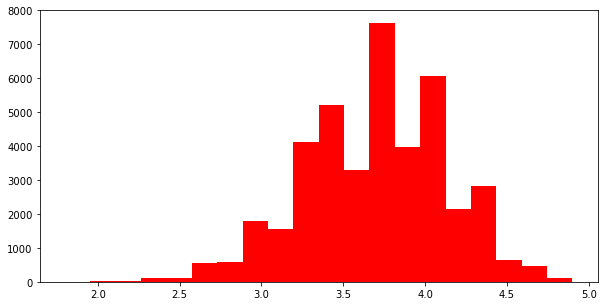

In [62]:
#distribution of Resturants rating

plt.figure(figsize=(10, 5))
plt.hist(zomato.rate, bins=20, color= 'r')
plt.show()

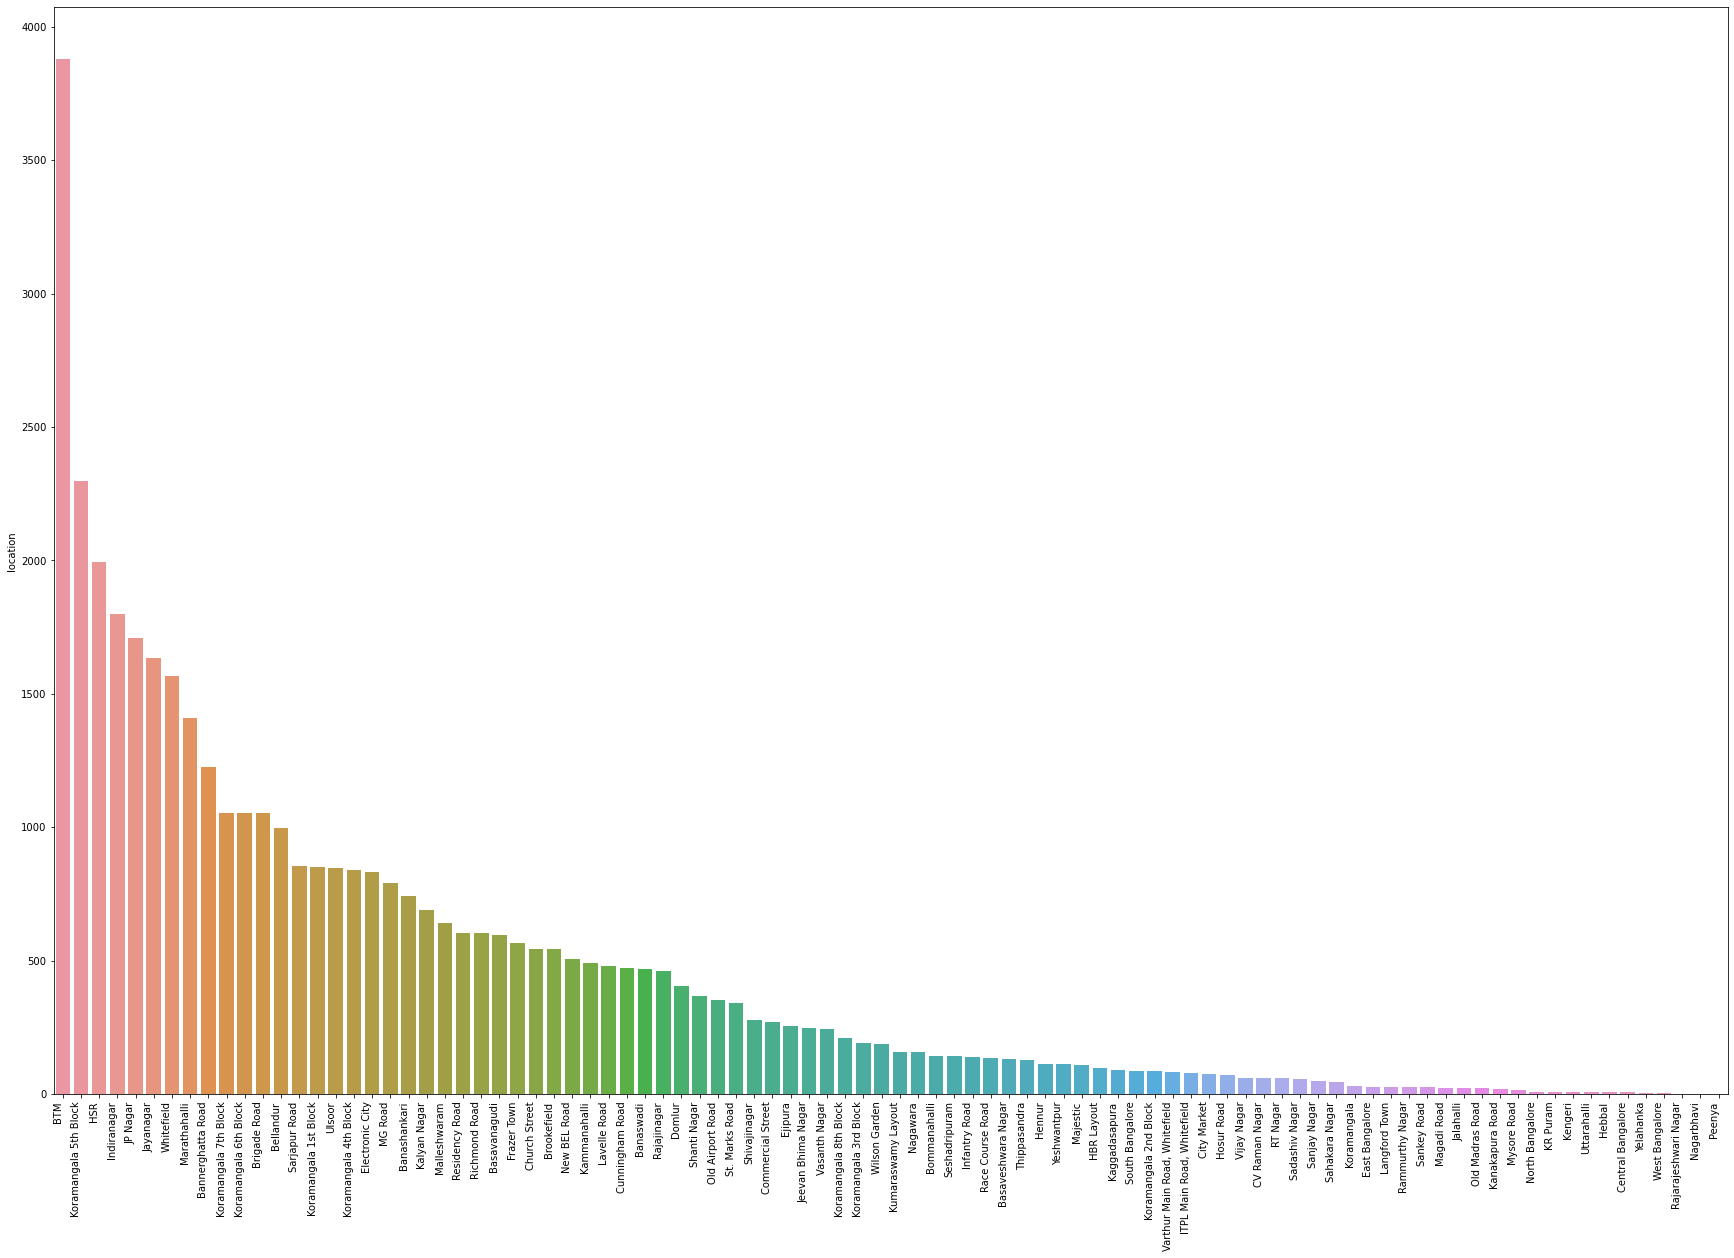

In [38]:
#plotting the distribution of locations

plt.figure(figsize=(30, 20))
ax= sns.barplot(data=zomato, x= zomato.location.value_counts().index, y= zomato.location.value_counts())
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha= 'right')
plt.show()

In [42]:
zomato['location'].value_counts()[:20]

BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1410
Bannerghatta Road        1226
Koramangala 7th Block    1055
Koramangala 6th Block    1054
Brigade Road             1052
Bellandur                 997
Sarjapur Road             854
Koramangala 1st Block     852
Ulsoor                    849
Koramangala 4th Block     841
Electronic City           834
MG Road                   793
Banashankari              744
Name: location, dtype: int64

In [51]:
pd.DataFrame(zomato.groupby('location') ['rate'].mean()).sort_values('rate', ascending=False).head(5)

,rate
location,
Lavelle Road,4.141788
Koramangala 3rd Block,4.020419
St. Marks Road,4.017201
Koramangala 5th Block,4.006661
Church Street,3.992125


In [64]:
# Dropping unnecessary columns
zomato_en.drop(["name",  "type_x", "address", "type_y",  "reviews_list"], axis = 1, inplace = True)

In [65]:
zomato_en.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cost', 'menu_item', 'city'],
      dtype='object')

# Regression Analysis

splitting the dataset

In [66]:
x= zomato_en.iloc[:,[0,1,2,3,4,5,7,8]]
y=zomato_en['cost']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .1, random_state= 1)
x_train.head()

,online_order,book_table,rate,votes,location,rest_type,menu_item,city
4221,1,0,3.4,8,73,25,0,2
13180,0,1,3.5,185,28,2,0,19
3586,0,0,4.0,52,16,0,0,10
26334,1,0,3.1,8,1,8,0,1
21611,1,0,3.7,160,49,2,0,0


In [67]:
y_train.head()

4221     200.0
13180    800.0
3586     300.0
26334    300.0
21611    500.0
Name: cost, dtype: float64

In [68]:
zomato_en['menu_item'].nunique()

2032

In [69]:
zomato_en['location'].nunique()

92

In [70]:
zomato_en['cuisines'].nunique()

KeyError: 'cuisines'

In [72]:
x.head()

,online_order,book_table,rate,votes,location,rest_type,menu_item,city
0,0,0,3.4,7,0,0,0,0
2,1,0,3.9,48,1,0,0,1
11,1,0,3.7,37,2,1,1,2
14,1,0,3.2,49,3,0,0,1
20,0,0,3.7,41,4,2,0,1


In [73]:
y.head()

0     200.0
2     400.0
11    400.0
14    300.0
20    450.0
Name: cost, dtype: float64

In [74]:
#Data Visualization

Text(0.5, 1.0, 'Resturants delivering online or not')

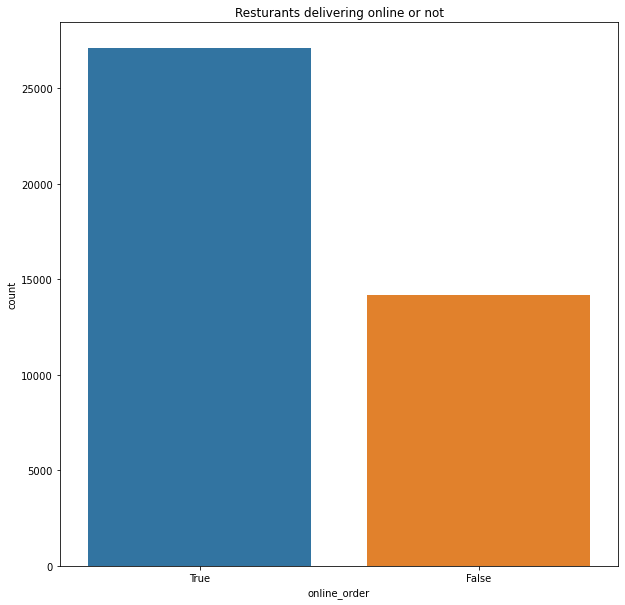

In [75]:
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("Resturants delivering online or not")


In [76]:
#resturants allowing table booking or not


Text(0.5, 1.0, 'Resturants allowing table booking or not')

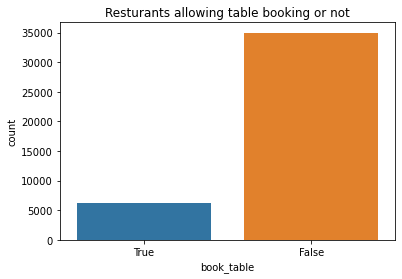

In [77]:
sns.countplot(zomato['book_table'])
fig.clf
fig.set_size_inches(10,10)
plt.title("Resturants allowing table booking or not")

In [78]:
#Table booking rate Vs normal rate

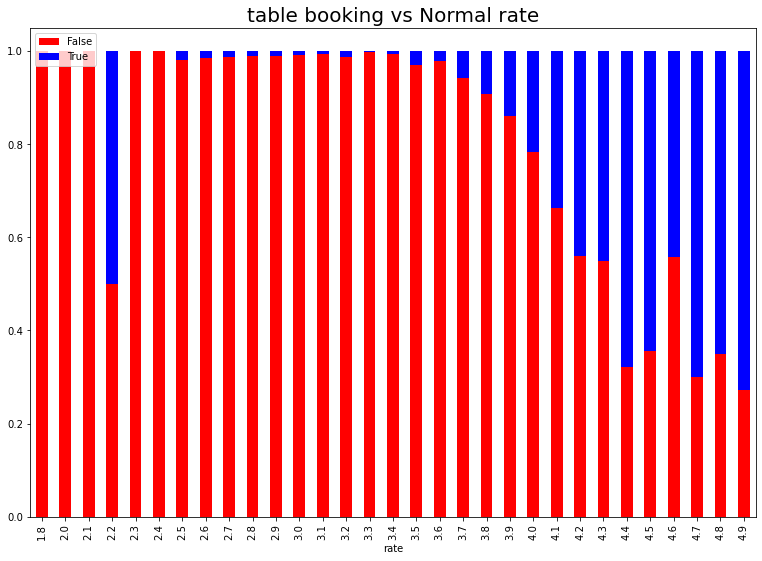

In [79]:
plt.rcParams['figure.figsize'] = (13,9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True, color= ['red', 'blue'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc ='upper left')
plt.show()



In [80]:
#location

Text(0.5, 1.0, 'Location wise count for resturants')

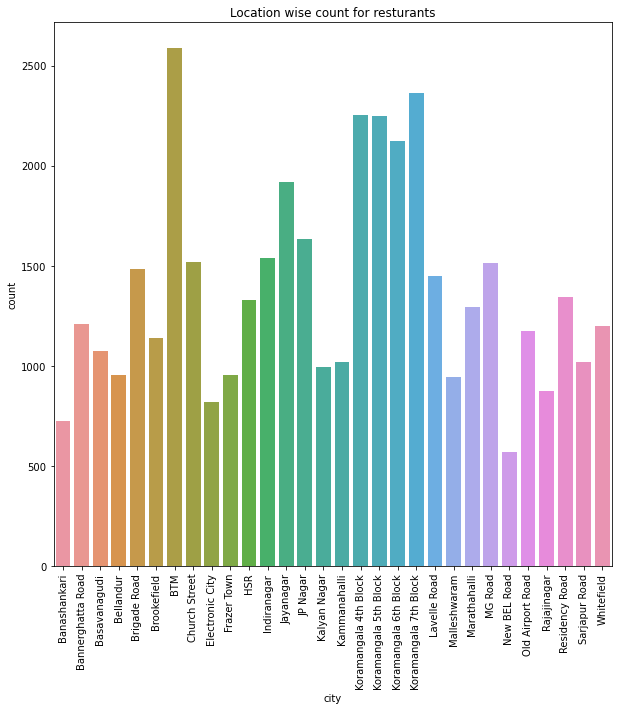

In [81]:
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation = 90, ha= 'center')
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.title('Location wise count for resturants')

Text(0.5, 0, 'Rate')

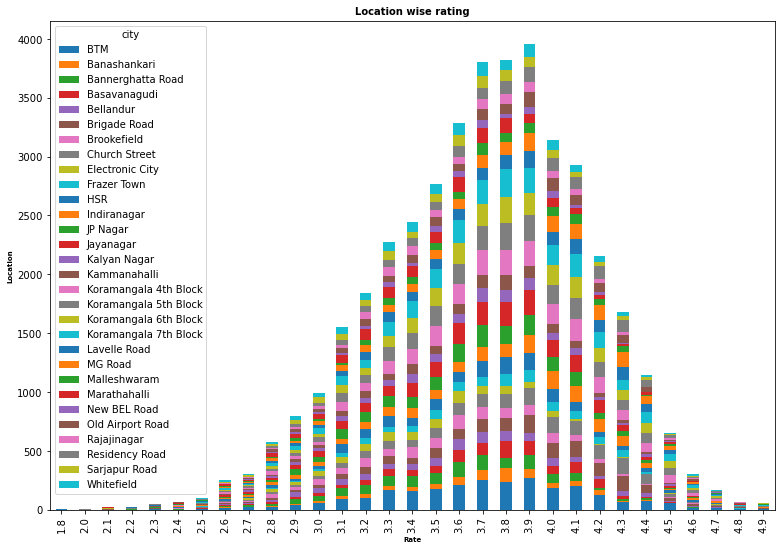

In [82]:
loc_plt= pd.crosstab(zomato['rate'], zomato['city'])
loc_plt.plot(kind= 'bar', stacked= True)
plt.title ('Location wise rating', fontsize=10, fontweight= 'bold')
plt.ylabel('Location', fontsize=7, fontweight='bold')
plt.xlabel('Rate', fontsize=7, fontweight='bold')


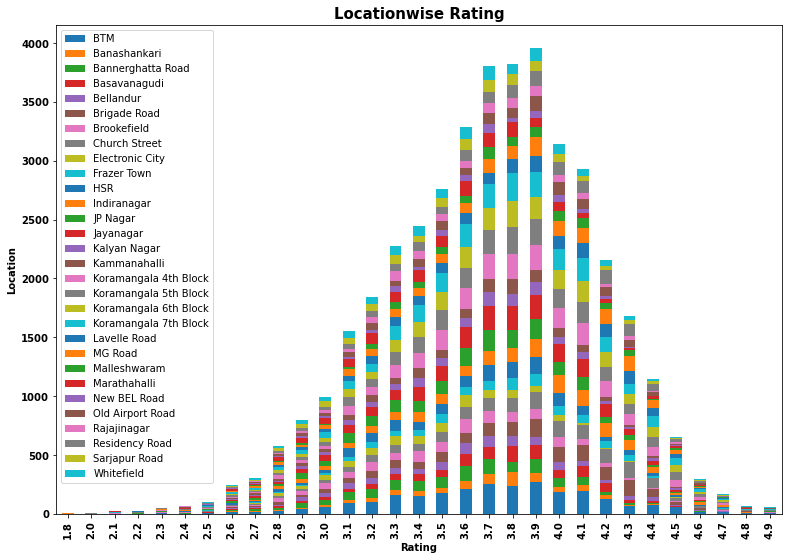

In [83]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

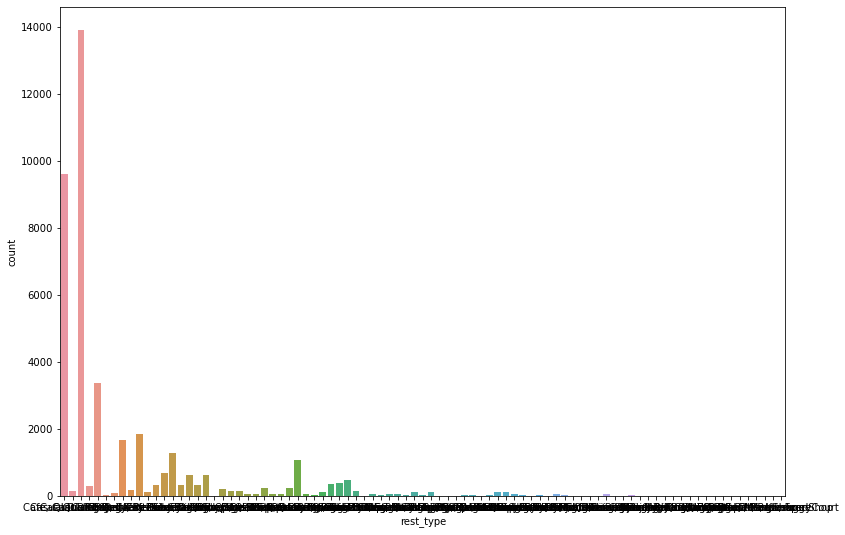

In [84]:
sns.countplot(zomato['rest_type'])

[Text(0, 0, 'Casual Dining'),
 Text(0, 0, 'Cafe, Casual Dining'),
 Text(0, 0, 'Quick Bites'),
 Text(0, 0, 'Casual Dining, Cafe'),
 Text(0, 0, 'Cafe'),
 Text(0, 0, 'Quick Bites, Cafe'),
 Text(0, 0, 'Cafe, Quick Bites'),
 Text(0, 0, 'Delivery'),
 Text(0, 0, 'Mess'),
 Text(0, 0, 'Dessert Parlor'),
 Text(0, 0, 'Bakery, Dessert Parlor'),
 Text(0, 0, 'Pub'),
 Text(0, 0, 'Bakery'),
 Text(0, 0, 'Takeaway, Delivery'),
 Text(0, 0, 'Fine Dining'),
 Text(0, 0, 'Beverage Shop'),
 Text(0, 0, 'Sweet Shop'),
 Text(0, 0, 'Bar'),
 Text(0, 0, 'Dessert Parlor, Sweet Shop'),
 Text(0, 0, 'Bakery, Quick Bites'),
 Text(0, 0, 'Sweet Shop, Quick Bites'),
 Text(0, 0, 'Kiosk'),
 Text(0, 0, 'Food Truck'),
 Text(0, 0, 'Quick Bites, Dessert Parlor'),
 Text(0, 0, 'Beverage Shop, Quick Bites'),
 Text(0, 0, 'Beverage Shop, Dessert Parlor'),
 Text(0, 0, 'Takeaway'),
 Text(0, 0, 'Pub, Casual Dining'),
 Text(0, 0, 'Casual Dining, Bar'),
 Text(0, 0, 'Dessert Parlor, Beverage Shop'),
 Text(0, 0, 'Quick Bites, Bakery'),
 Tex

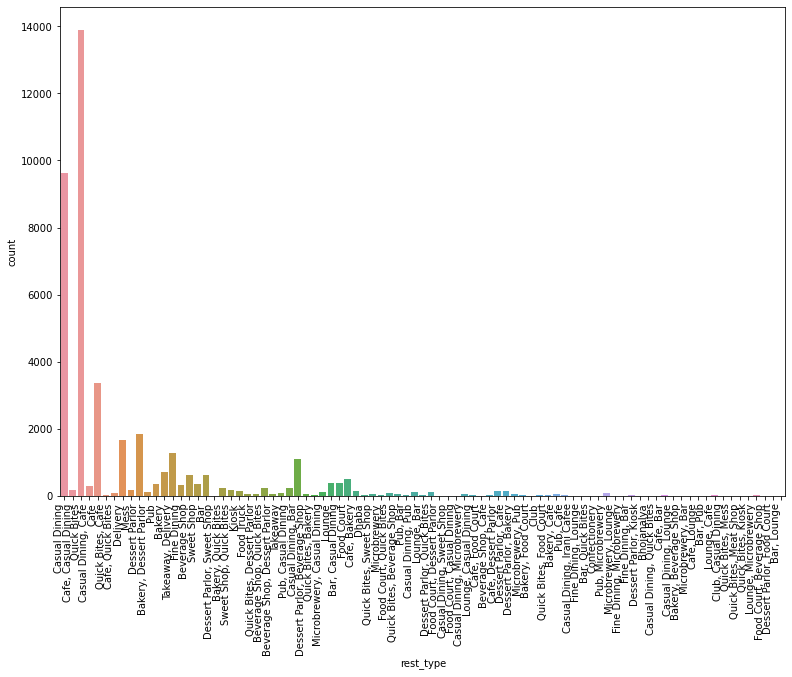

In [85]:
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")

Text(0.5, 1.0, 'Restuarant Type')

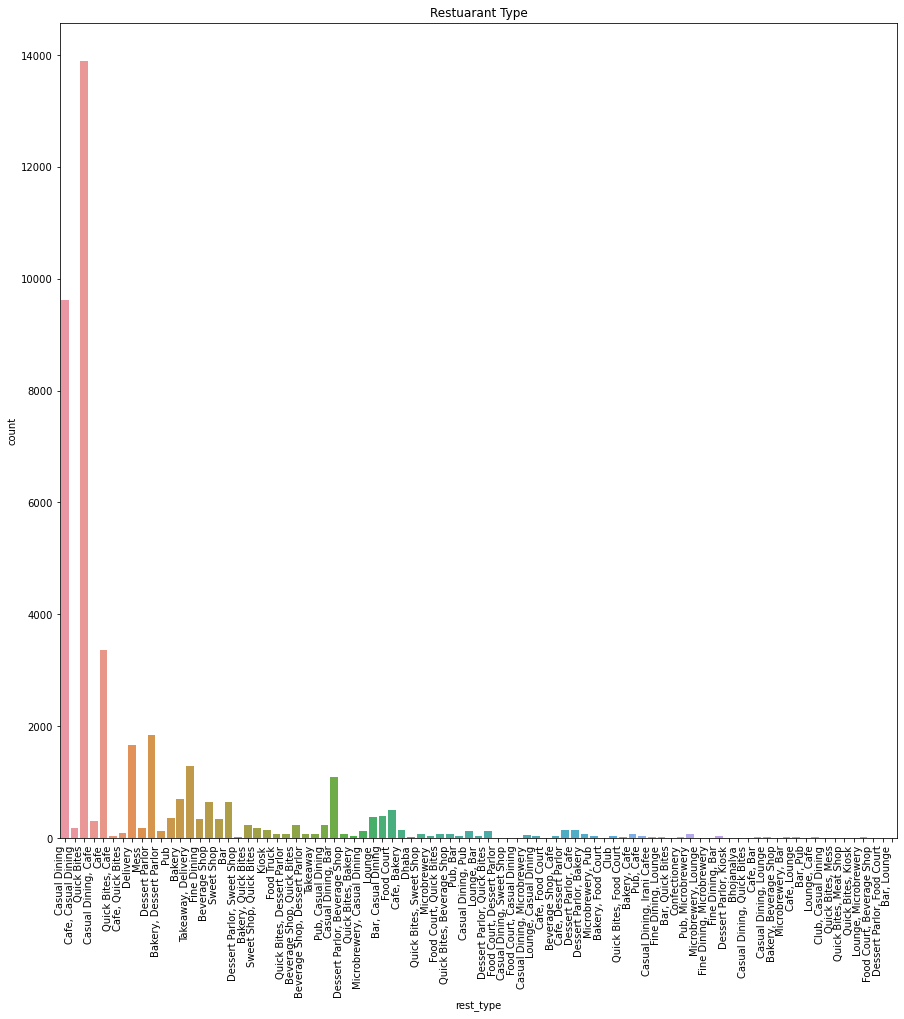

In [86]:
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

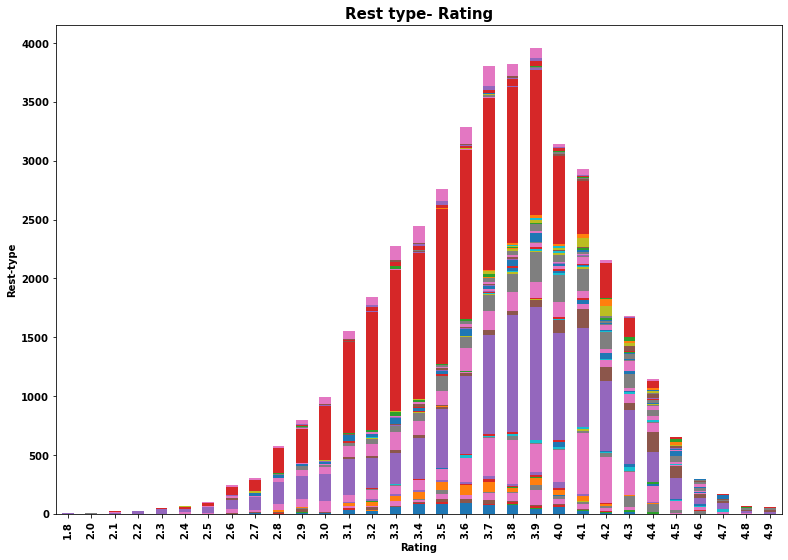

In [87]:
loc_plt1=pd.crosstab(zomato['rate'],zomato['rest_type'])
loc_plt1.plot(kind='bar',stacked=True);
plt.title('Rest type- Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest-type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

In [88]:
#types of Services

Text(0.5, 1.0, 'Typeof Service')

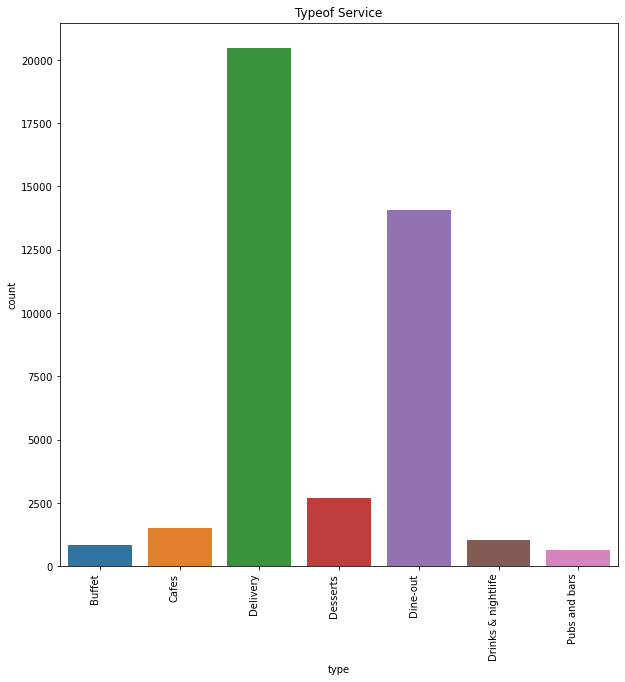

In [89]:
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation =90, ha='right')
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.title("Typeof Service")

In [90]:
#cost of resturant

Text(0.5, 1.0, 'Cost of Resturant')

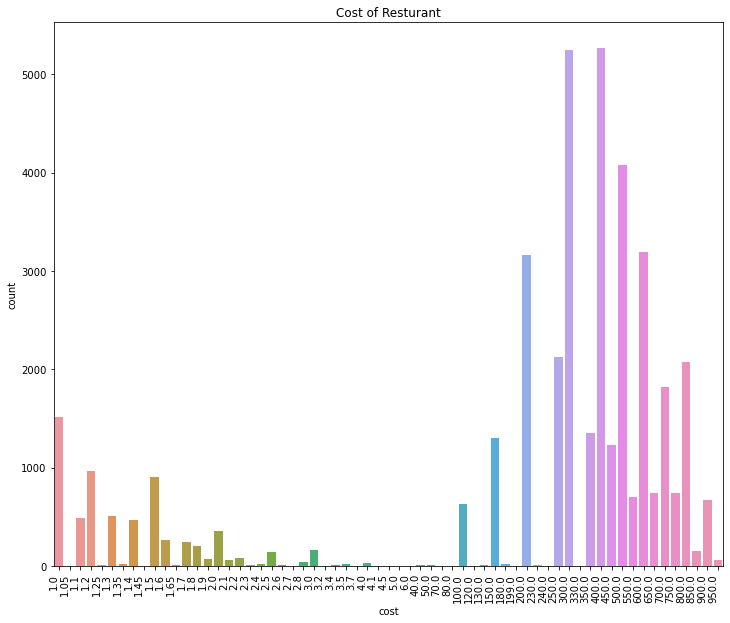

In [91]:
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation =90, ha='right')
fig= plt.gcf()
fig.set_size_inches(12,10)
plt.title("Cost of Resturant")

Text(0.5, 1.0, 'No. of Resturants in a location')

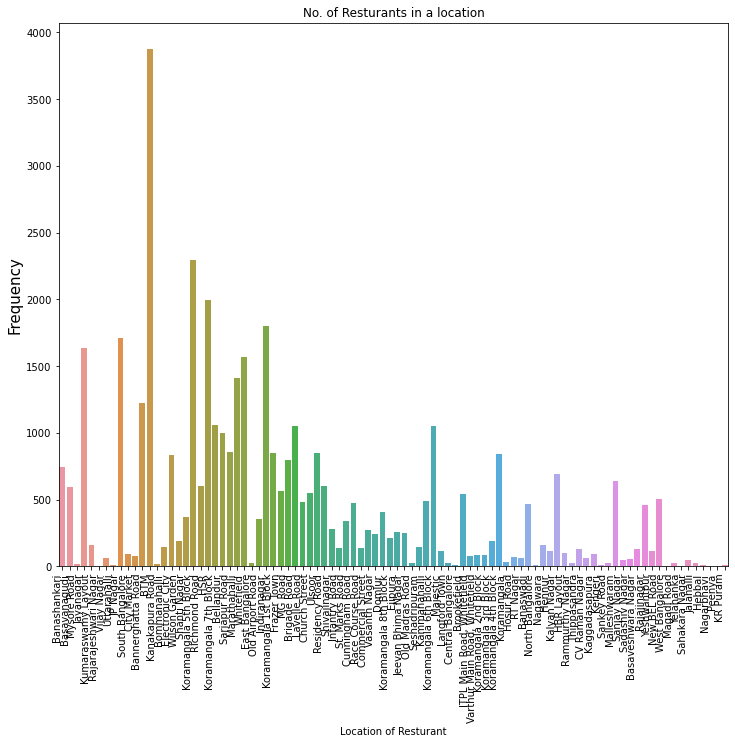

In [92]:
sns.countplot(zomato['location']).set_xticklabels(sns.countplot(zomato['location']).get_xticklabels(), rotation =90, ha='right')
fig= plt.gcf()
fig.set_size_inches(12,10)
plt.ylabel("Frequency", size=15)
plt.xlabel('Location of Resturant')
plt.title("No. of Resturants in a location")

In [93]:
#famous resturant chains in Bengaluru

Text(0.5, 0, 'Number of outlets')

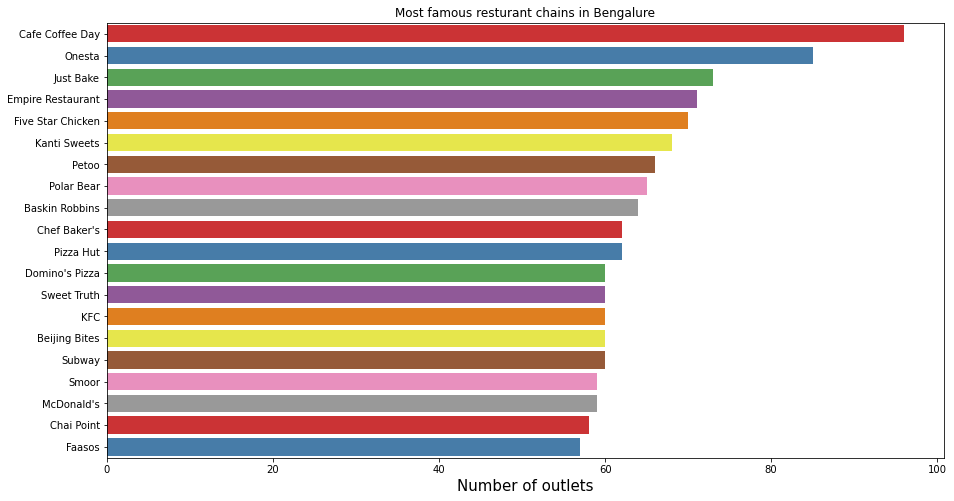

In [94]:
plt.figure(figsize=(15,8))
chains= data['name'].value_counts()[:20]
sns.barplot(x=chains, y= chains.index, palette='Set1')
plt.title('Most famous resturant chains in Bengalure')
plt.xlabel("Number of outlets", size=15)

In [102]:
# Top 5 most expensive locations (cost = cost for two)
(pd.DataFrame(newdata.groupby("location")["cost"].mean())).sort_values("cost", ascending = False).head(5)

,cost
location,
Rajarajeshwari Nagar,725.000000
Kengeri,500.000000
West Bangalore,475.000000
Old Madras Road,455.555556
Mysore Road,443.750000


In [104]:
# Identifying the high rated fancy restaurants on Rajarajeshwari Nagar
newdata[(newdata["location"] == "Rajarajeshwari Nagar") & (newdata["rate"] >= 4 )]

,name,address,type_x,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type_y,city
12931,Firangi Bake,"8th Main Road, Remco Bhel Layout, Ideal Homes ...",['Delivery'],True,False,4.0,53,Rajarajeshwari Nagar,Delivery,"Mexican, Italian",600.0,"[('Rated 5.0', 'RATED\n Delivery order\n\nDel...",[],Delivery,Banashankari


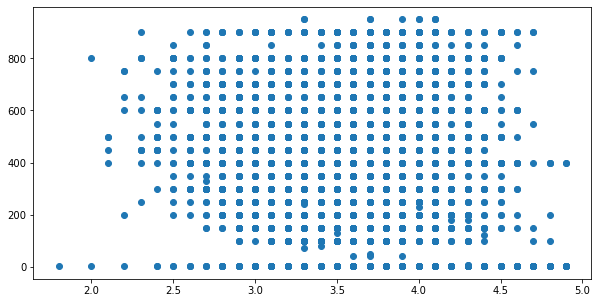

In [105]:
# Visualizing the relationship between rating and cost
plt.figure(figsize = (10, 5))
plt.scatter(newdata.rate, newdata.cost)
plt.show()

In [95]:
#Linear Regression Model

In [96]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.05189448320768808

In [97]:
from sklearn.tree import DecisionTreeRegressor
Dtree= DecisionTreeRegressor(min_samples_leaf=.0001)
Dtree.fit(x_train, y_train)
y_pred= Dtree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.24310648366798926

In [98]:
#random forest Regressor
from sklearn.ensemble import RandomForestRegressor
Rforest = RandomForestRegressor(n_estimators=500, random_state=329, min_samples_leaf=0.0001)
Rforest.fit(x_train, y_train)
y_pred = Rforest.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.27957331879021785

In [99]:
#Extra tree Regressor
from sklearn.ensemble import ExtraTreesRegressor
Etree= ExtraTreesRegressor(n_estimators = 100)
Etree.fit(x_train, y_train)
y_pred = Etree.predict(x_test)
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.23337732936973232

In [100]:
from sklearn.linear_model import Ridge
Rid= Ridge(alpha= 1.0)
Rid.fit(x_train, y_train)
y_pred = Rid.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.05198461115753883

In [101]:
from sklearn.linear_model import Lasso
Las= Lasso(alpha=1.0)
Las.fit(x_train, y_train)
y_pred= Las.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.05466914376697185

In [110]:
from xgboost import XGBRegressor
xgb= XGBRegressor(n_estimators= 10, max_depth = 8, gamma=0.25, colsample_bytree= 0.8, random_state=0)
xgb.fit(x_train, y_train)
y_pred= xgb.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.31629566504503137